# 연습

1. csv/num_1/ chipotle.tsv 로드 
2. order_id 컬럼의 데이터의 타입을 str 변경 
    : 이유 -> 통계요약정보 describe() 숫자형의 데이터만 계산.
        order_id는 통계요약할 정보가 아니라서 미리 문자 형태로 변경하자
3. 가장 많이 주문한 item_name을 출력 
4. item당 주문 총량의 top10을 바 그래프 표시 
5. item_price의 '$'를 제거하고 데이터의 타입을 float형태로 변경
6. 주문당 평균 계산 금액 출력

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform
import matplotlib.pyplot as plt
plt.rc('font', family = 'Malgun Gothic')


In [6]:
import seaborn as sns

In [7]:
df = pd.read_csv('../csv/num_1/chipotle.tsv', sep = '\t')

df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [8]:
_origin_data = df.copy()

In [9]:
# order_id 컬럼 데이터 타입 str 변경  
df['order_id'] = df['order_id'].astype(str)



In [10]:
# 가장 많이 주문한 item_name
df.sort_values('quantity', ascending= False)['item_name'][0]

'Chips and Fresh Tomato Salsa'

In [11]:
df = df.sort_values('quantity', ascending= False).reset_index(drop = True)
df

,order_id,quantity,item_name,choice_description,item_price
0,1443,15,Chips and Fresh Tomato Salsa,NaN,$44.25
1,1660,10,Bottled Water,NaN,$15.00
2,1559,8,Side of Chips,NaN,$13.52
3,1443,7,Bottled Water,NaN,$10.50
4,970,5,Bottled Water,NaN,$7.50
...,...,...,...,...,...
4617,645,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25
4618,645,1,Chips and Tomatillo Green Chili Salsa,NaN,$2.95
4619,646,1,Carnitas Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$9.25
4620,646,1,Chicken Burrito,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$11.25


In [12]:
# item 당 주문 총량 top10

df_top = df[['quantity', 'item_name']].groupby('item_name').sum()
df_top

,quantity
item_name,
6 Pack Soft Drink,55
Barbacoa Bowl,66
Barbacoa Burrito,91
Barbacoa Crispy Tacos,12
Barbacoa Salad Bowl,10
Barbacoa Soft Tacos,25
Bottled Water,211
Bowl,4
Burrito,6


In [13]:
df_top10 = df_top.sort_values('quantity', ascending=False).iloc[0:10]
df_top10

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351
Chips,230
Steak Bowl,221
Bottled Water,211
Chips and Fresh Tomato Salsa,130


<Axes: xlabel='item_name'>

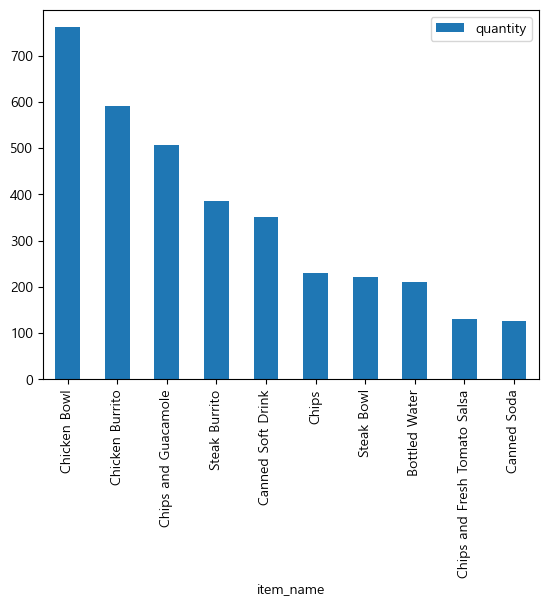

In [14]:
df_top10.plot.bar()

In [15]:
df

,order_id,quantity,item_name,choice_description,item_price
0,1443,15,Chips and Fresh Tomato Salsa,NaN,$44.25
1,1660,10,Bottled Water,NaN,$15.00
2,1559,8,Side of Chips,NaN,$13.52
3,1443,7,Bottled Water,NaN,$10.50
4,970,5,Bottled Water,NaN,$7.50
...,...,...,...,...,...
4617,645,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25
4618,645,1,Chips and Tomatillo Green Chili Salsa,NaN,$2.95
4619,646,1,Carnitas Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$9.25
4620,646,1,Chicken Burrito,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$11.25


In [16]:
# item_price $제거 후 타입 float 변경 

df['item_price'] =  df['item_price'].str.replace('$', '')
df


C:\Users\zino0\AppData\Local\Temp\ipykernel_19468\3655417820.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['item_price'] =  df['item_price'].str.replace('$', '')


,order_id,quantity,item_name,choice_description,item_price
0,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25
1,1660,10,Bottled Water,NaN,15.00
2,1559,8,Side of Chips,NaN,13.52
3,1443,7,Bottled Water,NaN,10.50
4,970,5,Bottled Water,NaN,7.50
...,...,...,...,...,...
4617,645,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
4618,645,1,Chips and Tomatillo Green Chili Salsa,NaN,2.95
4619,646,1,Carnitas Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",9.25
4620,646,1,Chicken Burrito,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",11.25


In [17]:
df['item_price'] = df['item_price'].astype(float)
df

,order_id,quantity,item_name,choice_description,item_price
0,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25
1,1660,10,Bottled Water,NaN,15.00
2,1559,8,Side of Chips,NaN,13.52
3,1443,7,Bottled Water,NaN,10.50
4,970,5,Bottled Water,NaN,7.50
...,...,...,...,...,...
4617,645,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
4618,645,1,Chips and Tomatillo Green Chili Salsa,NaN,2.95
4619,646,1,Carnitas Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",9.25
4620,646,1,Chicken Burrito,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",11.25


In [18]:
# 주문당 평균 계산 금액(ZiNo : 개당 아이템 가격으로 이해 )

# 총 주문 금액 / 총 quantity

# 총 주문금액 ( = quantity * item_price) 컬럼 생성

df['total rev'] = df['quantity'] * df['item_price']
df 

,order_id,quantity,item_name,choice_description,item_price,total rev
0,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25,663.75
1,1660,10,Bottled Water,NaN,15.00,150.00
2,1559,8,Side of Chips,NaN,13.52,108.16
3,1443,7,Bottled Water,NaN,10.50,73.50
4,970,5,Bottled Water,NaN,7.50,37.50
...,...,...,...,...,...,...
4617,645,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25,11.25
4618,645,1,Chips and Tomatillo Green Chili Salsa,NaN,2.95,2.95
4619,646,1,Carnitas Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",9.25,9.25
4620,646,1,Chicken Burrito,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",11.25,11.25


In [19]:
# 총 total rev / 총quantity 

df['total rev'].sum()/df['quantity'].sum()

7.891596942880129

In [21]:
# 총 금액  /order ID

df[['order_id', 'item_price']].groupby('order_id').sum().mean()

item_price    18.811429
dtype: float64

In [22]:
# Moon

df = pd.read_csv('../csv/num_1/chipotle.tsv', sep = '\t')

df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [23]:
# order ID , 문자형태 str로

df['order_id'] = df['order_id'].astype('str')

In [35]:
# df.groupby('item_name').sum()['quantity'].sort_values(ascending= False) # 시리즈 형태에서는 sort_values에서 기준 인자 입력할 필요 X 

group_data = df.groupby('item_name').sum()[['quantity']].sort_values('quantity', ascending= False)
group_data

C:\Users\zino0\AppData\Local\Temp\ipykernel_19468\3561720933.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_data = df.groupby('item_name').sum()[['quantity']].sort_values('quantity', ascending= False)


,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351
Chips,230
Steak Bowl,221
Bottled Water,211
Chips and Fresh Tomato Salsa,130


In [36]:
# 가장많이 주문한 건

group_data.index[0]

'Chicken Bowl'

<Axes: xlabel='item_name'>

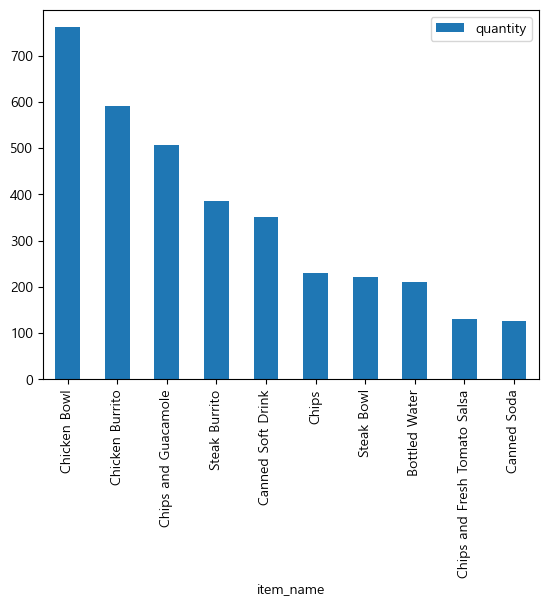

In [37]:
# 주문당 주문총량 Top 10 시각화(bar)
 
group_data.head(10).plot.bar()


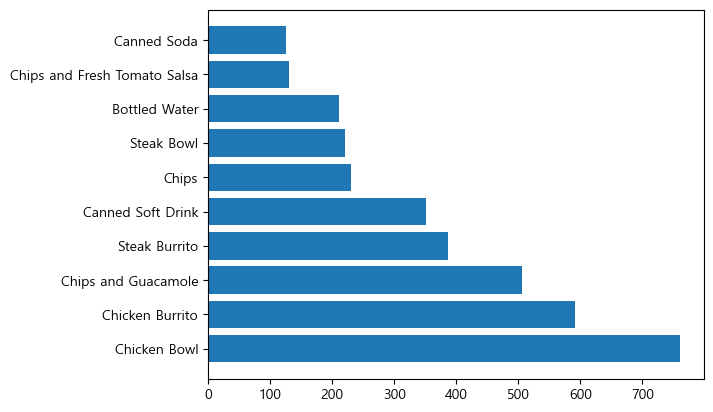

In [39]:
x = group_data.head(10).index
y = group_data.head(10)['quantity']

plt.barh(x, y)

plt.show()

In [40]:
df.head(1)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB


In [46]:
# item_price의 $ 를 제거 

# Case I -> replace() 

# df['item_price'].replace('$', '') # 시리즈 형태라서 시리즈 안에 replace 내장함수 다른 역할을 한게 실행된 것 -> 암튼 안바뀜
df['item_price'].str.replace('$', '') # str.replace() 이렇게 써서 문자열 함수 replace를 쓸 수 있게 해야

C:\Users\zino0\AppData\Local\Temp\ipykernel_19468\445091443.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['item_price'].str.replace('$', '') # str.replace() 이렇게 써서 문자열 함수 replace를 쓸 수 있게 해야


0        2.39 
1        3.39 
2        3.39 
3        2.39 
4       16.98 
         ...  
4617    11.75 
4618    11.75 
4619    11.25 
4620     8.75 
4621     8.75 
Name: item_price, Length: 4622, dtype: object

In [47]:
# Case II -> strip()

df['item_price'].str.lstrip('$')

0        2.39 
1        3.39 
2        3.39 
3        2.39 
4       16.98 
         ...  
4617    11.75 
4618    11.75 
4619    11.25 
4620     8.75 
4621     8.75 
Name: item_price, Length: 4622, dtype: object

In [48]:
# Case III

def change(x) :
    # x의 데이터 타입은 무엇? -> 문자 object -> 문자열 내장함수 다 사용 가능
    x = x.replace('$', "")
    # x = x.lstrip('$')
    return x

df['item_price'].apply(change)

0        2.39 
1        3.39 
2        3.39 
3        2.39 
4       16.98 
         ...  
4617    11.75 
4618    11.75 
4619    11.25 
4620     8.75 
4621     8.75 
Name: item_price, Length: 4622, dtype: object

In [50]:
# Case IV

df['item_price'] = df['item_price'].apply(lambda y : y.replace('$', ''))

In [52]:
df['item_price'] = df['item_price'].astype('float') 

In [53]:
# 주문당 평균 계산 금액 
# 주문당 금액 합 구하고 한 주문당 평균

df.groupby('order_id').sum()['item_price'].mean()

C:\Users\zino0\AppData\Local\Temp\ipykernel_19468\4170286844.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('order_id').sum()['item_price'].mean()


18.811428571428568

In [55]:
# 가장 인기 많은 chicken bowl 
# 이 메뉴를 2개 이상 주문한 고객들이 주문한 chicken bowl의 평균 주문 수량 




df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [59]:
df.apply(lambda x : df.drop(axis = 0) if df['item_name'] != 'Chicken Bowl')


SyntaxError: expected 'else' after 'if' expression (4138419434.py, line 1)

In [66]:
# Moon

# df['quantity'] >=2 and df['item_name'] = Chicken Bowl

df.loc[(df['quantity']>=2) & (df['item_name']=='Chicken Bowl')]['quantity'].mean()

2.0606060606060606